#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
warnings.filterwarnings("ignore")
import pycountry
%matplotlib inline

#### Import the CSV Data as Pandas DataFrame


In [2]:
df = pd.read_csv("ds_cleaned.csv")

#### Show Top 5 Records


In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Updated_Job_Title
0,2020,MI,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,Full-time,Machine Learning Scientist,260000,USD,260000,Others,0,Others,S,Machine Learning Engineer
2,2020,SE,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,Full-time,Product Data Analyst,20000,USD,20000,Others,0,Others,S,Data Analyst
4,2020,SE,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning Engineer


#### Shape of the dataset


In [4]:
df.shape

(607, 12)

#### Summary of the dataset


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Check Datatypes in the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
 11  Updated_Job_Title   607 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.0+ KB


In [7]:
numeric_features = ['salary']

In [8]:
num_df = df[numeric_features]

#### Assumptions of ANOVA
- The different groups/levels must have equal sample sizes.
- An ANOVA can only be conducted if the dependent variable is normally distributed.
- Population variances must be equal (i.e. homoscedastic). Homogeneity of variance means that the deviation of scores (measured by the range or standard deviation for example) is similar between populations.

#### Check normally distribution of dependent variable ie. Salary Using Visualization


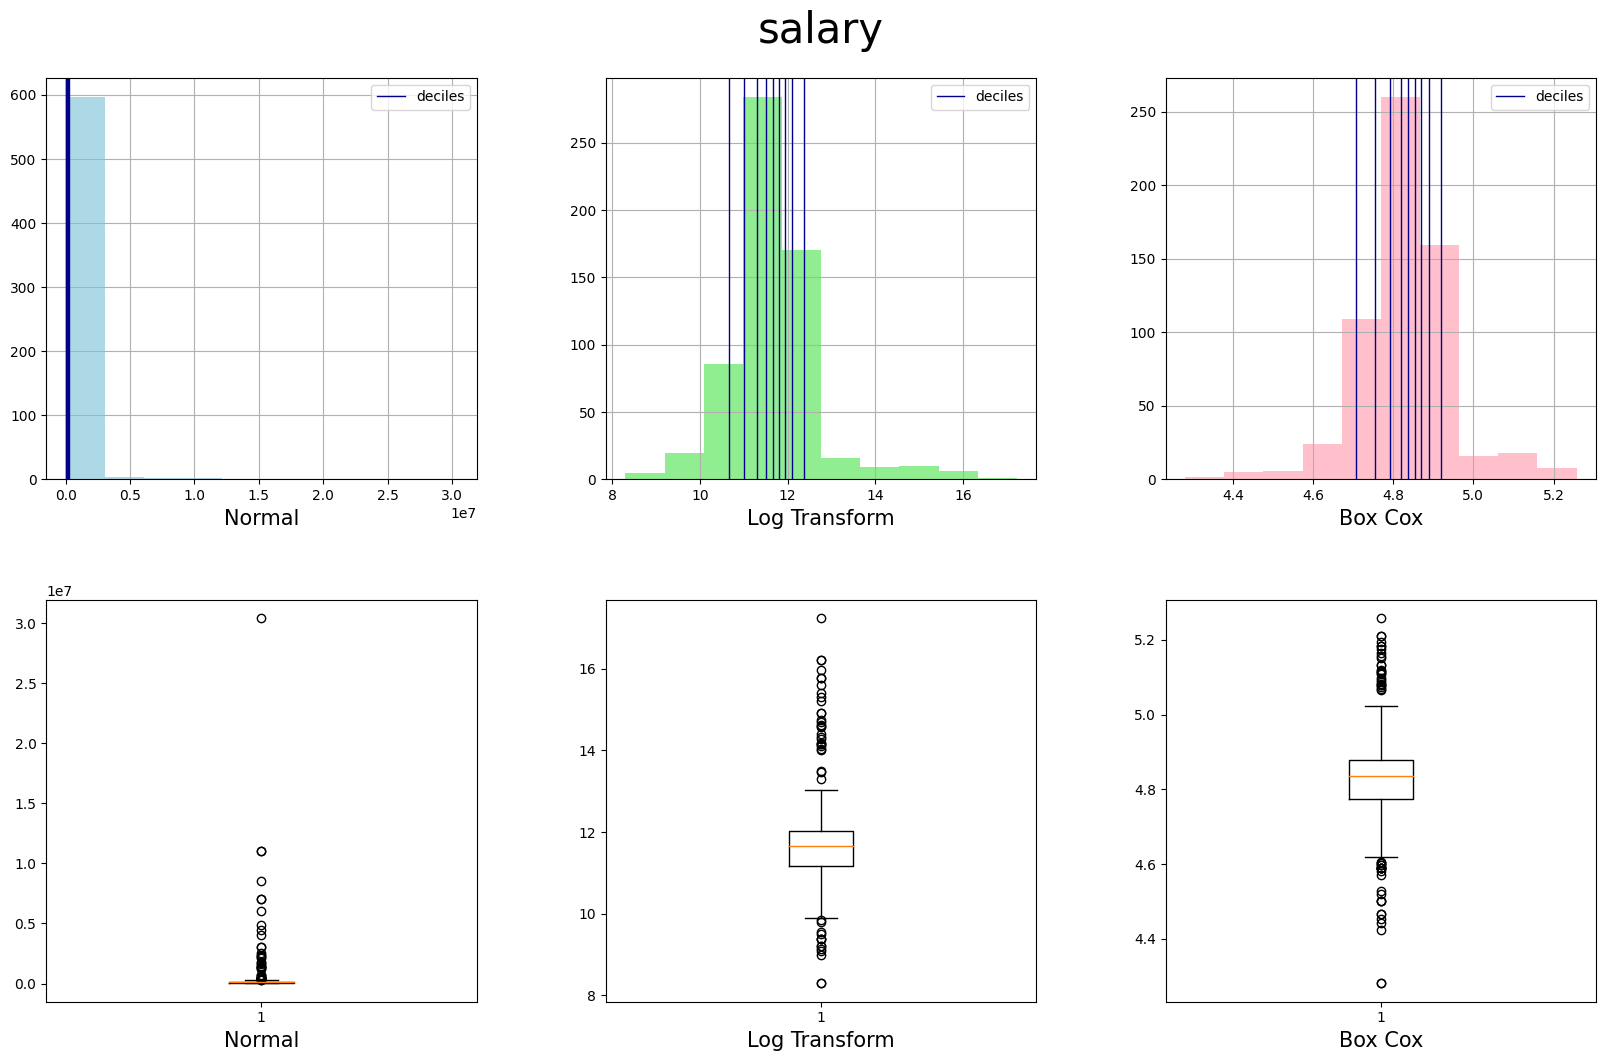

In [9]:
from scipy.stats import boxcox
for col in num_df.columns:
    normal = df[col]
    transforms = [[normal, 'Normal', 'lightblue'], 
                  [(normal+1).transform(np.log), 'Log Transform', 'lightgreen'], 
                  [boxcox(normal+1)[0], 'Box Cox', 'pink']]
    fig, axes = plt.subplots(2, len(transforms), figsize=(20, 12))
    
    for ax in axes[0]:
        transform = transforms[list(axes[0]).index(ax)]
        pd.DataFrame(transform[0]).hist(ax=ax, color=transform[2])
        ax.set_title('')
        ax.set_xlabel(transform[1], fontsize=15)
        
        deciles = pd.Series(transform[0]).quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        for pos in np.array(deciles).reshape(1, -1)[0]:
            handle = ax.axvline(pos, color='darkblue', linewidth=1)
        ax.legend([handle], ['deciles'])
        
    for ax in axes[1]:
        transform = transforms[list(axes[1]).index(ax)]
        ax.boxplot(transform[0])
        ax.set_title('')
        ax.set_xlabel(transform[1], fontsize=15)
        
    axes[0][int(np.floor(len(transforms)/2))].set_title(col, pad=25, fontsize=30)
    plt.show()

BEFORE mu salary : 324000.0626029654, sigma salary : 1543084.8391295222
AFTER mu salary : 4.827002411293989, sigma salary : 0.11356298599462843


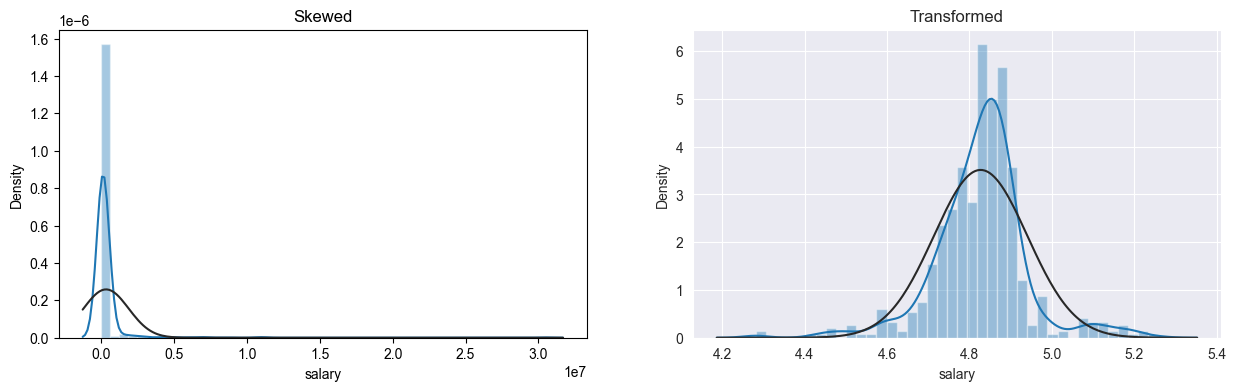

In [10]:
from scipy.stats import norm, skew, boxcox,yeojohnson
for i in numeric_features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.set_style('darkgrid')
    sns.distplot(df[i], fit = norm)
    plt.title('Skewed')
    (mu, sigma) = norm.fit(df[i])
    print("BEFORE mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    
    plt.subplot(122)
    df[i], lam = boxcox(df[i]+0.0001)
    sns.set_style('darkgrid')
    sns.distplot(df[i], fit = norm)
    plt.title('Transformed')
    (mu, sigma) = norm.fit(df[i])
    print("AFTER mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    
    plt.show()

#### Insights
- After comparision we can see Box Cox transformation is performing best.

<Axes.ArtistList of 2 lines>

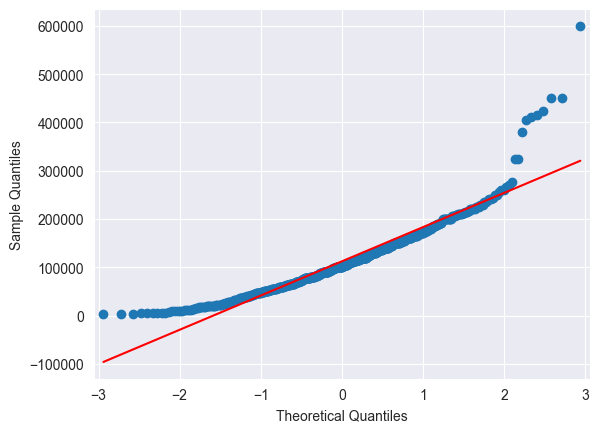

In [13]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['salary_in_usd'], line='s').gca().lines

In [14]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import levene

#### Shapiro Wick Test
- The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.
- Ho : Sample is normally distributed
- H1 : Sample is not normally distributed

In [15]:
stat, p = shapiro(df['salary_in_usd'])
# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
print(msg)

Sample does not look Gaussian (reject H0)


#### K^2 Normality Test
- Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness
     - Ho : Data is normally distributed
     - H1 : Data is not normally distributed

In [16]:
stat, p = normaltest(df['salary_in_usd'])
# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
print(msg)

Sample does not look Gaussian (reject H0)


#### Transform data & save lambda value


In [17]:
fitted_data, fitted_lambda = stats.boxcox(np.log(df['salary_in_usd']))
df['transformed_salary_in_usd']=pd.Series(fitted_data)

#### ANOVA test can be applied by normalising the data with the box-cox transformation


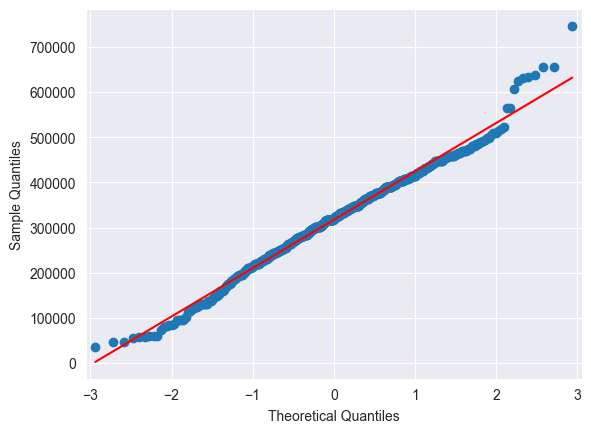

In [18]:
qqplot_data = qqplot(df['transformed_salary_in_usd'], line='s').gca().lines

In [19]:
stat, p = normaltest(df['transformed_salary_in_usd'])
# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
print(msg)

Sample looks Gaussian (fail to reject H0)


#### Insights
- After the Box-cox transformation, it seems that the data converges more to the normal than before.
- In this state, the ANOVA technique can be applied to the data.

#### Point-Plot
- Displays mean of categorical column(X-axis, Experience_level) with numerical column(Y-axis, Salary)

<Axes: xlabel='experience_level', ylabel='transformed_salary_in_usd'>

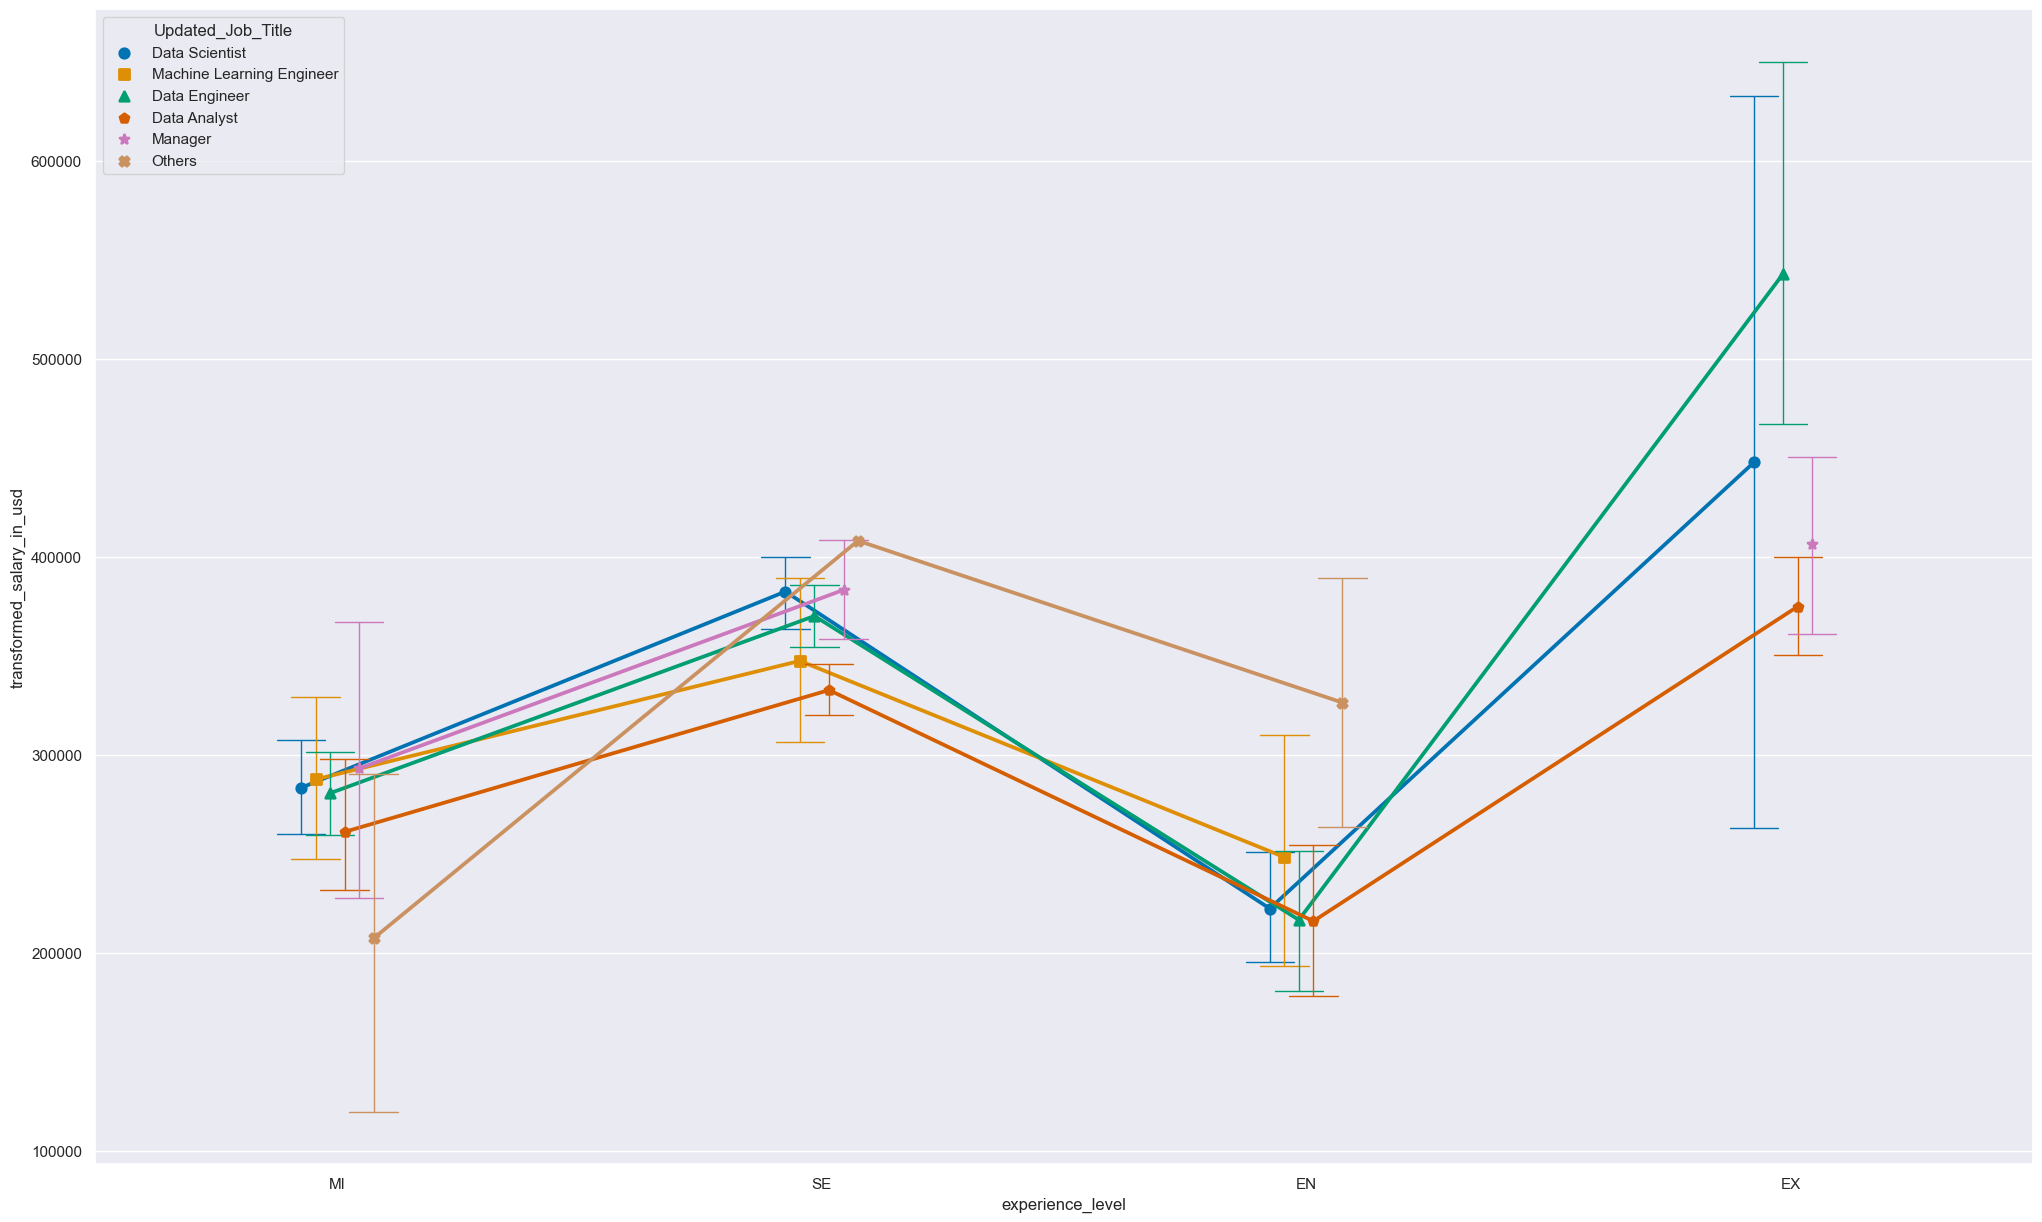

In [20]:
sns.set(rc={"figure.figsize":(25, 15)})
sns.pointplot(data=df, x='experience_level', y='transformed_salary_in_usd', hue='Updated_Job_Title', dodge=True, markers=['o', 's', '^', 'p', '*', 'X', 'd', '8'], capsize=.1, errwidth=1, palette='colorblind')

#### Insights
- Job type and experience level are the 2 features we can choose for ANNOVA test.
- They seem to differ from each other in the graph which tells the groups will differ significantly in terms of means.
- The curves in the graph intersect each other at more than one point, in other words, they do not show parallelism with each other.

#### Variance Homogenity(Levene's Test)
- **Equality of variance test**
- Ho : Female and male have equal variance
- H1 : Female and male do not have equal variance

In [21]:
Data_Scientist = df[df['Updated_Job_Title']=='Data Scientist']['transformed_salary_in_usd']
Machine_Learning_Engineer = df[df['Updated_Job_Title']=='Machine Learning Engineer']['transformed_salary_in_usd']
Data_Engineer = df[df['Updated_Job_Title']=='Data Engineer']['transformed_salary_in_usd']
Data_Analyst = df[df['Updated_Job_Title']=='Data Analyst']['transformed_salary_in_usd']
Manager = df[df['Updated_Job_Title']=='Manager']['transformed_salary_in_usd']

stat_jobtype, p_value_jobtype = levene(Data_Scientist, Machine_Learning_Engineer, Data_Engineer , Data_Analyst,Manager, center='median')
print('Job type levene test:', stat_jobtype, p_value_jobtype)

Job type levene test: 3.9779369011474186 0.0034051940871168617


In [22]:
Midlevel = df[df['experience_level']=='MI']['transformed_salary_in_usd']
Seniorlevel = df[df['experience_level']=='SE']['transformed_salary_in_usd']
Entrylevel = df[df['experience_level']=='EN']['transformed_salary_in_usd']
Executivelevel = df[df['experience_level']=='EX']['transformed_salary_in_usd']

stat_experiencelevel, p_value_experiencelevel = levene(Midlevel, Seniorlevel, Entrylevel, Executivelevel, center='median')
print('Experience level levene test:', stat_experiencelevel, p_value_experiencelevel)

Experience level levene test: 3.897314585098833 0.00892970340907589


#### Insights
- For both job type and experience_level variable, the variances between the groups are equal.
- As both p values are lesser than significance value ie. 0.05.

In [23]:
# perform two-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('transformed_salary_in_usd ~ C(job_title) + C(experience_level) + C(job_title):C(experience_level)', data = df).fit()
sm.stats.anova_lm(model, typ=3)

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 147, but rank is 85
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,7.463914e+10,1.0,11.459156,7.671530e-04
C(job_title),8.710417e+11,49.0,2.729159,2.001970e-08
C(experience_level),6.186550e+11,3.0,31.660175,9.308803e-19
C(job_title):C(experience_level),4.670480e+12,147.0,4.877869,7.305020e-30
Residual,3.269774e+12,502.0,NaN,NaN


In [24]:
df.drop(columns=['salary','salary_in_usd','job_title','salary_currency'], inplace=True)

In [25]:
df.rename(columns={'transformed_salary_in_usd':'salary'}, inplace = True)

In [26]:
df.to_csv('ds_feature_eng', index= False)